In [527]:
import cmath
import numpy as np
import scipy.optimize as fitter
import matplotlib.pyplot as plt

from qutip import *
from qutip.qip.pulse import Pulse
from qutip.qip.device import Processor

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [528]:
import matplotlib
matplotlib.rcParams.update(
        {"font.family": "STIXGeneral",
         "xtick.labelsize": 20,
         "xtick.direction": "in",
         "xtick.major.pad": 8,
         "xtick.top": True,
         "ytick.labelsize": 20,
         "ytick.direction": "in",
         "ytick.right": True,
         "axes.labelsize": 20,
         "axes.labelpad": 10,
         "axes.grid": True
    }
)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [529]:
def fitting_sin(x, A, B, ohm, phase):
    return (A * (np.sin(ohm * x + phase) + B))

'''To calculate eta (To get omega_bsb)'''
lamb = 729e-9
m = 40
u = 1.66e-27
#axial trap freq
omega_t = 2*np.pi*0.9e6
hbar = 1.05e-34
x0 = np.sqrt(hbar/(2*m*u*omega_t))
eta = (2*np.pi/lamb)*x0
print('x0 (m) = ', x0)
print('eta = ', eta)

'''From Roos P80'''
f_ω = 6720          #e3
delta =  1740       #e3 #4.11523e14 We just use MHz as our unit #Second axial sidebands (wz = (27r) 1740 kHz)
h_bar = 1           #6.62607004e-34 / (2 * np.pi)
η = 2 * np.pi * np.sqrt( h_bar / (2 * f_ω * 2 * np.pi * 6.6551079e-26)) / 729e-9
print('η = ', η)

omega = 10
omega_bsb = omega * np.sqrt(0+1) * eta

x0 (m) =  1.182454458420721e-08
eta =  0.10191468421890354
η =  1.1497018255015402e+17


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


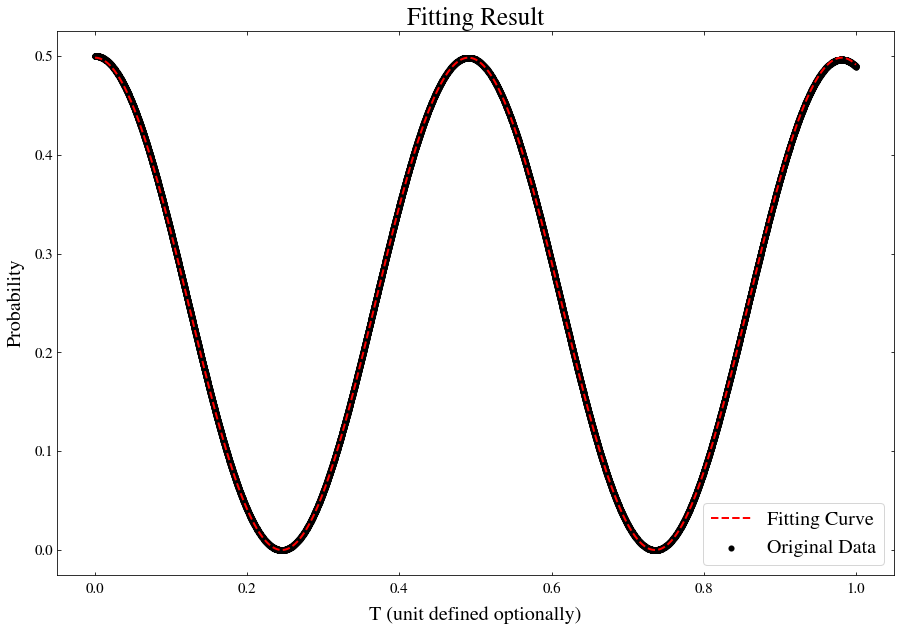

0.49058452388291207


In [530]:
#1 Considering the pulse for Blue sideband (To get fitted T for our pulse)
Times = 10
Nstates = 50
internal_ini = np.sqrt(1/2) * basis(2, 0) + np.sqrt(1/2) * basis(2, 1)
oscillation_ini = basis(Nstates, 0)
psi0_ini = tensor(internal_ini, oscillation_ini)

'''Sigma-Z, sigmaz(). Sigma plus, sigmap(). Sigma minus, sigmam()'''
a_bsb = tensor(qeye(2), destroy(Nstates))
a_bsb_dagger = tensor(qeye(2), create(Nstates))
sigmaZ_bsb = tensor(sigmaz(), qeye(Nstates))
sigmaP_bsb = tensor(sigmap(), qeye(Nstates))
sigmaM_bsb = tensor(sigmam(), qeye(Nstates))

H_0 = h_bar*f_ω*2*np.pi*(a_bsb_dagger * a_bsb) + h_bar*delta*0.5*2*np.pi*(sigmaZ_bsb)
H_blue = h_bar*omega_bsb*2*np.pi*(a_bsb * sigmaP_bsb - a_bsb_dagger * sigmaM_bsb)*1j
H = H_blue
tg = 1
t_list = np.linspace(0, tg, 10000)
output_bsb = mesolve(H, psi0_ini, t_list, [])

down_bsb = tensor(basis(2, 0), qeye(Nstates))
up_bsb = tensor(basis(2, 1), qeye(Nstates))

state0_bsb = down_bsb * down_bsb.dag()
state1_bsb = up_bsb * up_bsb.dag()
result0_bsb = expect(state0_bsb, output_bsb.states)
result1_bsb = expect(state1_bsb, output_bsb.states)

'''To check whether the result is reasonable'''
'''Note: this fitting is quite sensitive to initial values'''
par0 = np.array([0.25,1,10,8])
par, cov = fitter.curve_fit(fitting_sin, t_list, result0_bsb, par0)
fit_y = fitting_sin(t_list, *par)

plt.figure(figsize = (15, 10))
plt.rc('font',family='STIXGeneral')
plt.plot(t_list, fit_y, 'r--', lw=2)
plt.scatter(t_list, result0_bsb, color='k', marker='o', linewidths = 0.1)
plt.title('Fitting Result', fontdict={'family' : 'STIXGeneral', 'size':25})
plt.xlabel('T (unit defined optionally)', fontdict={'family' : 'STIXGeneral', 'size':20})
plt.ylabel('Probability', fontdict={'family' : 'STIXGeneral', 'size':20})
plt.yticks(fontproperties='STIXGeneral', size=15)
plt.xticks(fontproperties='STIXGeneral', size=15)
plt.legend(("Fitting Curve", "Original Data"), fontsize=20)
plt.grid()
plt.show()

'''Optimal T has been obtained'''
T = 2 * np.pi / par[2]
print(T)

0.4905827331349054


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


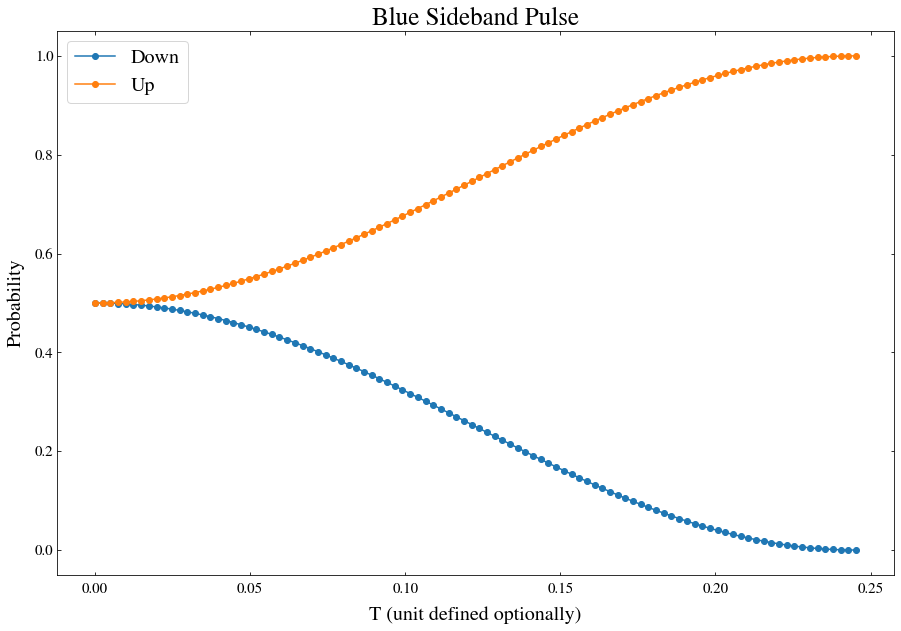

Quantum object: dims = [[2, 30], [1, 1]], shape = (60, 1), type = ket
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.70710678]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]
Quantum object: dims = [[2, 30], [1, 1]], shape = (60, 1), type = ket
Qobj da

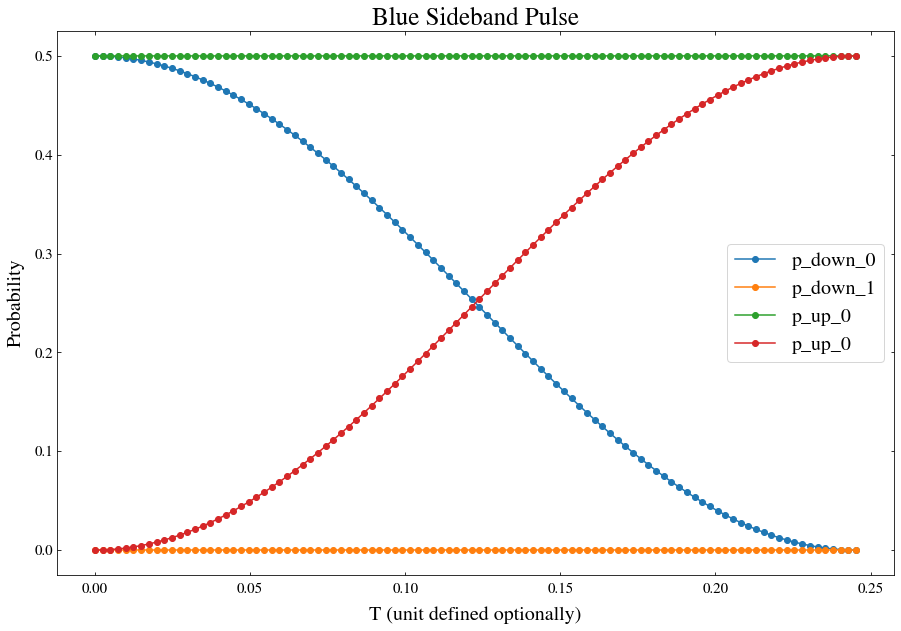

In [510]:
#1 Considering the pulse for Blue sideband (Using abtained T to simulate this progress)
H = H_blue
print(T)
tg = T/2
t_list = np.linspace(0, tg, 100)
output_pulse = mesolve(H, psi0_ini, t_list, [])
psi_after_bsb = output_pulse.states[-1]

'''To check whether the result is reasonable'''
result0_bsb = expect(state0_bsb, output_pulse.states)
result1_bsb = expect(state1_bsb, output_pulse.states)

plt.figure(figsize = (15, 10))
plt.rc('font',family='STIXGeneral')
plt.plot(t_list,result0_bsb,marker='o',label='Down')
plt.plot(t_list,result1_bsb,marker='o',label='Up')
plt.title('Blue Sideband Pulse', fontdict={'family' : 'STIXGeneral', 'size':25})
plt.xlabel('T (unit defined optionally)', fontdict={'family' : 'STIXGeneral', 'size':20})
plt.ylabel('Probability', fontdict={'family' : 'STIXGeneral', 'size':20})
plt.yticks(fontproperties='STIXGeneral', size=15)
plt.xticks(fontproperties='STIXGeneral', size=15)
plt.legend(("Down", "Up"), fontsize=20)
plt.grid()
plt.show()
print(output_pulse.states[0])
print(output_pulse.states[-1])

p_down_0 = []
p_down_1 = []
p_up_0 = []
p_up_1 = []
for i in range(len(t_list)):
    p_down_0.append(float(abs(output_pulse.states[i][0]))**2)
    p_down_1.append(float(abs(output_pulse.states[i][1]))**2)
    p_up_0.append(float(abs(output_pulse.states[i][Nstates]))**2)
    p_up_1.append(float(abs(output_pulse.states[i][Nstates+1]))**2)

plt.figure(figsize = (15, 10))
plt.rc('font',family='STIXGeneral')
plt.plot(t_list,p_down_0,marker='o',label='p_down_0')
plt.plot(t_list,p_down_1,marker='o',label='p_down_1')
plt.plot(t_list,p_up_0,marker='o',label='p_up_0')
plt.plot(t_list,p_up_1,marker='o',label='p_up_1')
plt.title('Blue Sideband Pulse', fontdict={'family' : 'STIXGeneral', 'size':25})
plt.xlabel('T (unit defined optionally)', fontdict={'family' : 'STIXGeneral', 'size':20})
plt.ylabel('Probability', fontdict={'family' : 'STIXGeneral', 'size':20})
plt.yticks(fontproperties='STIXGeneral', size=15)
plt.xticks(fontproperties='STIXGeneral', size=15)
plt.legend(("p_down_0", "p_down_1", 'p_up_0', 'p_up_0'), fontsize=20)
plt.grid()
plt.show()

In [511]:
#2 Corrected Ramsey Wait Time Simulation (no decoherence)
Nstates = 30
'''γ*nh = 2 quanta / 100 ms = 0.02 (heating rate)'''
γ = 0.0002
nh = 100
cops = np.sqrt(γ * (nh + 1)) * destroy(Nstates) + np.sqrt(γ * nh) * create(Nstates)
collapse_opr = tensor(qeye(2), cops)
H_wait = H_0
t_wait = 5
t_wait_list = np.linspace(0, t_wait, 2000)
psi_after_bsb = output_pulse.states[-1]
rho_after_bsb = ket2dm(psi_after_bsb)
output_wait = mesolve(H_wait, rho_after_bsb, t_wait_list, [], [])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [512]:
#3 Simulate the blue sideband after Ramsey (no decoherence)
rhos = output_wait.states
for i in range(len(rhos)):
    rhos[i] = rhos[i].ptrace([0, 1])

Hadamard = snot()
ground = basis(2,0)
excited = basis(2,1)
state0 = ground * ground.dag()
state1 = excited * excited.dag()

T_bsb = T
tg = T/2
t_list_bsb = np.linspace(0, tg, 100)
final_down = []
final_up = []
for i in range(len(rhos)):
    H = H_blue  #[H_0, H_blue]
    output_pulse_temp = mesolve(H, rhos[i], t_list_bsb, [])
    rho_after_bsb_temp = output_pulse_temp.states[-1]
    rho_after_bsb_temp = rho_after_bsb_temp.ptrace(0)
    rho_for_measure_temp = Hadamard * rho_after_bsb_temp * Hadamard.dag()
    result0 = expect(state0, rho_for_measure_temp)
    result1 = expect(state1, rho_for_measure_temp)
    final_down.append(result0)
    final_up.append(result1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-512-7ab7e0e88a77>:6: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  Hadamard = snot()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


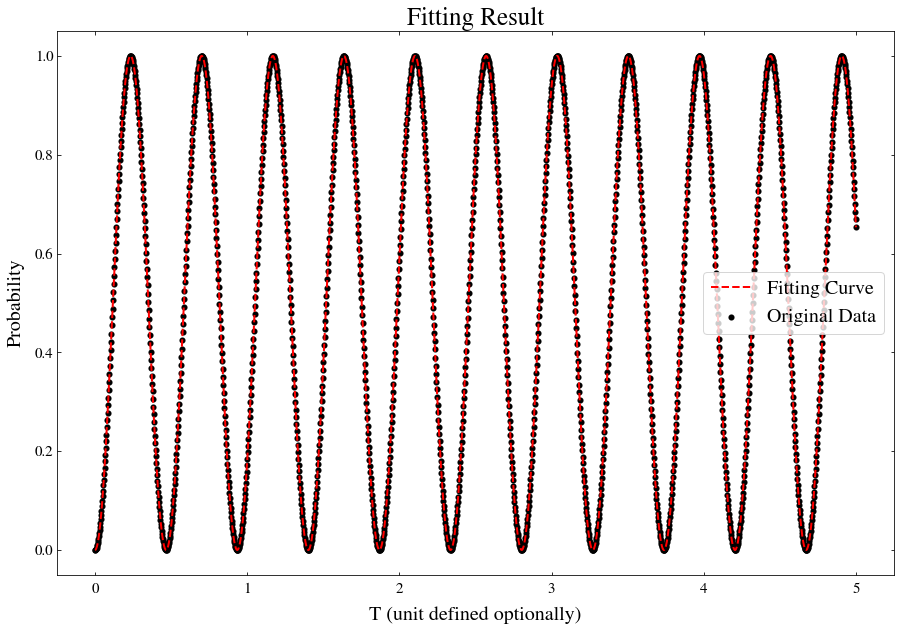

[ 0.5001576   0.99968619 13.44657262  4.7124415 ]


In [513]:
'''
def fitting_sin(x, A, B, ohm, phase):
    return (A * (np.sin(ohm * x + phase) + B))
'''

par0 = np.array([0.5,1,13.5,5])
par, cov = fitter.curve_fit(fitting_sin, t_wait_list, final_down, par0)
fit_y = fitting_sin(t_wait_list, *par)

plt.figure(figsize = (15, 10))
plt.rc('font',family='STIXGeneral')
plt.plot(t_wait_list, fit_y, 'r--', lw=2)
plt.scatter(t_wait_list, final_down, color='k', marker='o', linewidths = 0.1)
plt.title('Fitting Result', fontdict={'family' : 'STIXGeneral', 'size':25})
plt.xlabel('T (unit defined optionally)', fontdict={'family' : 'STIXGeneral', 'size':20})
plt.ylabel('Probability', fontdict={'family' : 'STIXGeneral', 'size':20})
plt.yticks(fontproperties='STIXGeneral', size=15)
plt.xticks(fontproperties='STIXGeneral', size=15)
plt.legend(("Fitting Curve", "Original Data"), fontsize=20)
plt.grid()
plt.show()

print(par)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:11: DeprecationWarning: invalid escape sequence \l
<>:11: DeprecationWarning: invalid escape sequence \l
<ipython-input-514-61f254eeb28b>:11: DeprecationWarning: invalid escape sequence \l
  plt.legend(("$\left|\downarrow\\rangle\\right.$",), fontsize=20)


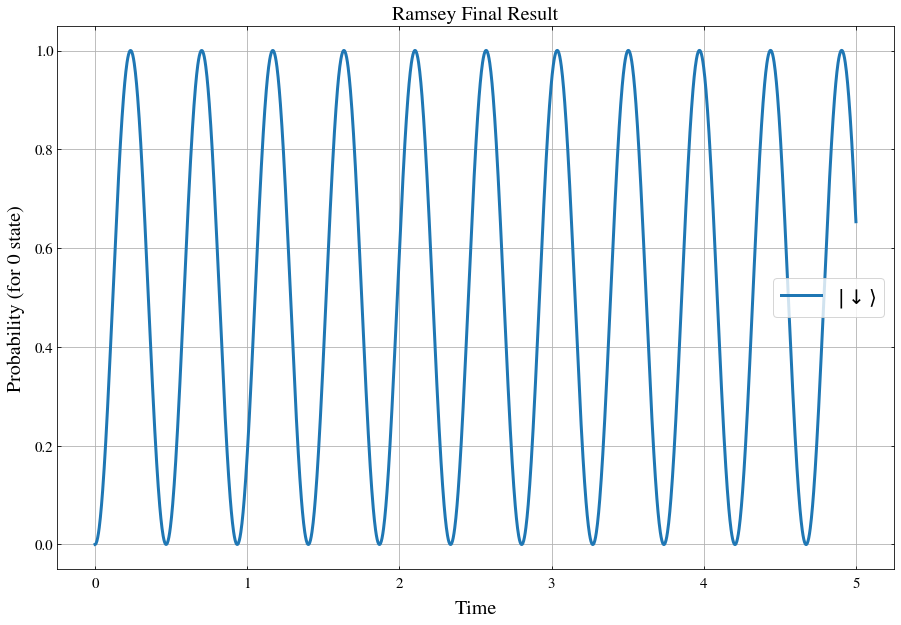

In [514]:
'''plt.plot'''
plt.figure(figsize = (15, 10))
plt.rc('font',family='STIXGeneral')
plt.plot(t_wait_list, final_down, color='C0', lw = 3)   #, marker='.'
#plt.scatter(t_wait_list, final_down, color='k', marker='o')
plt.title('Ramsey Final Result', fontdict={'family' : 'STIXGeneral', 'size':20})
plt.xlabel('Time', fontdict={'family' : 'STIXGeneral', 'size':20})
plt.ylabel('Probability (for 0 state)', fontdict={'family' : 'STIXGeneral', 'size':20})
plt.yticks(fontproperties='STIXGeneral', size=15)
plt.xticks(fontproperties='STIXGeneral', size=15)
plt.legend(("$\left|\downarrow\\rangle\\right.$",), fontsize=20)
plt.grid(True)
plt.show()

In [515]:
#2 Corrected Ramsey Wait Time Simulation
Nstates = 30
'''γ*nh = 2 quanta / 100 ms = 0.02 (heating rate)'''
γ = 0.0002
nh = 100
cops = np.sqrt(γ * (nh + 1)) * destroy(Nstates) + np.sqrt(γ * nh) * create(Nstates)
collapse_opr = tensor(qeye(2), cops)
H_wait = H_0
t_wait = 500
t_wait_list = np.linspace(0, t_wait, 10000)
psi_after_bsb = output_pulse.states[-1]
rho_after_bsb = ket2dm(psi_after_bsb)
output_wait = mesolve(H_wait, rho_after_bsb, t_wait_list, [collapse_opr], [])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [516]:
#3 Simulate the blue sideband after Ramsey
rhos = output_wait.states
for i in range(len(rhos)):
    rhos[i] = rhos[i].ptrace([0, 1])

Hadamard = snot()
ground = basis(2,0)
excited = basis(2,1)
state0 = ground * ground.dag()
state1 = excited * excited.dag()

T_bsb = T
tg = T/2
t_list_bsb = np.linspace(0, tg, 100)
final_down = []
final_up = []
for i in range(len(rhos)):
    H = H_blue  #[H_0, H_blue]
    output_pulse_temp = mesolve(H, rhos[i], t_list_bsb, [])
    rho_after_bsb_temp = output_pulse_temp.states[-1]
    rho_after_bsb_temp = rho_after_bsb_temp.ptrace(0)
    rho_for_measure_temp = Hadamard * rho_after_bsb_temp * Hadamard.dag()
    result0 = expect(state0, rho_for_measure_temp)
    result1 = expect(state1, rho_for_measure_temp)
    final_down.append(result0)
    final_up.append(result1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-516-40f780cf84e2>:6: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  Hadamard = snot()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:11: DeprecationWarning: invalid escape sequence \l
<>:11: DeprecationWarning: invalid escape sequence \l
<ipython-input-517-61f254eeb28b>:11: DeprecationWarning: invalid escape sequence \l
  plt.legend(("$\left|\downarrow\\rangle\\right.$",), fontsize=20)


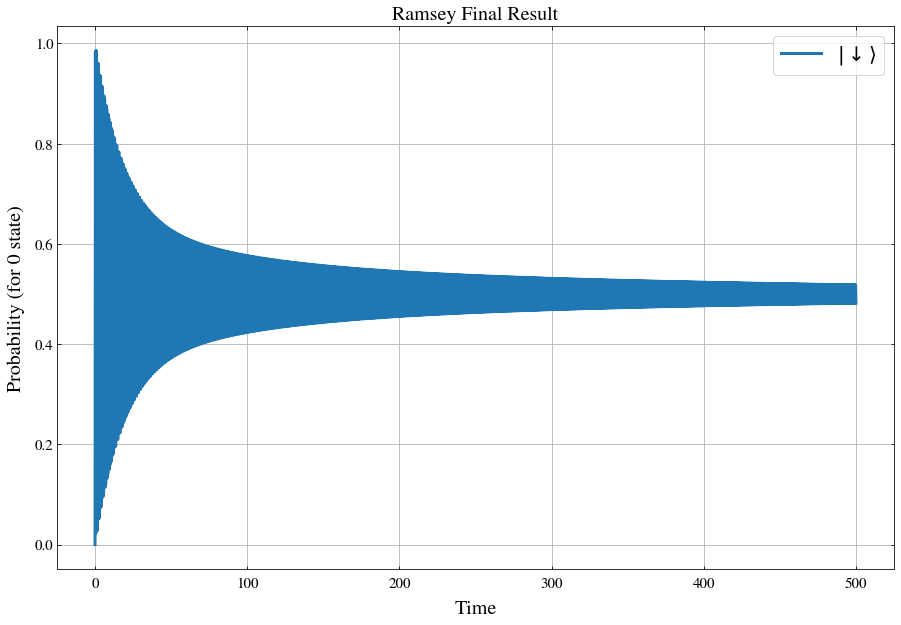

In [517]:
'''plt.plot'''
plt.figure(figsize = (15, 10))
plt.rc('font',family='STIXGeneral')
plt.plot(t_wait_list, final_down, color='C0', lw = 3)   #, marker='.'
#plt.scatter(t_wait_list, final_down, color='k', marker='o')
plt.title('Ramsey Final Result', fontdict={'family' : 'STIXGeneral', 'size':20})
plt.xlabel('Time', fontdict={'family' : 'STIXGeneral', 'size':20})
plt.ylabel('Probability (for 0 state)', fontdict={'family' : 'STIXGeneral', 'size':20})
plt.yticks(fontproperties='STIXGeneral', size=15)
plt.xticks(fontproperties='STIXGeneral', size=15)
plt.legend(("$\left|\downarrow\\rangle\\right.$",), fontsize=20)
plt.grid(True)
plt.show()

In [518]:
#2 MC - Corrected Ramsey Wait Time Simulation
'''γ*nh = 2 quanta / 100 ms = 0.02 (heating rate)'''
'''
Nstates = 30
γ = 0.0002
nh = 100
cops = np.sqrt(γ * (nh + 1)) * destroy(Nstates) + np.sqrt(γ * nh) * create(Nstates)
collapse_opr = tensor(qeye(2), cops)
H_wait = H_0
t_wait = 5
t_wait_list = np.linspace(0, t_wait, 2000)
psi_after_bsb = output_pulse.states[-1]
rho_after_bsb = ket2dm(psi_after_bsb)
a = tensor(destroy(2), qeye(Nstates))
result_mc = mcsolve(H_wait, psi_after_bsb, t_wait_list, [collapse_opr], [a.dag() * a], ntraj=100)
'''

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'\nNstates = 30\nγ = 0.0002\nnh = 100\ncops = np.sqrt(γ * (nh + 1)) * destroy(Nstates) + np.sqrt(γ * nh) * create(Nstates)\ncollapse_opr = tensor(qeye(2), cops)\nH_wait = H_0\nt_wait = 5\nt_wait_list = np.linspace(0, t_wait, 2000)\npsi_after_bsb = output_pulse.states[-1]\nrho_after_bsb = ket2dm(psi_after_bsb)\na = tensor(destroy(2), qeye(Nstates))\nresult_mc = mcsolve(H_wait, psi_after_bsb, t_wait_list, [collapse_opr], [a.dag() * a], ntraj=100)\n'

In [519]:
from scipy.signal import find_peaks
final_down = np.array(final_down)
max = find_peaks(final_down)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


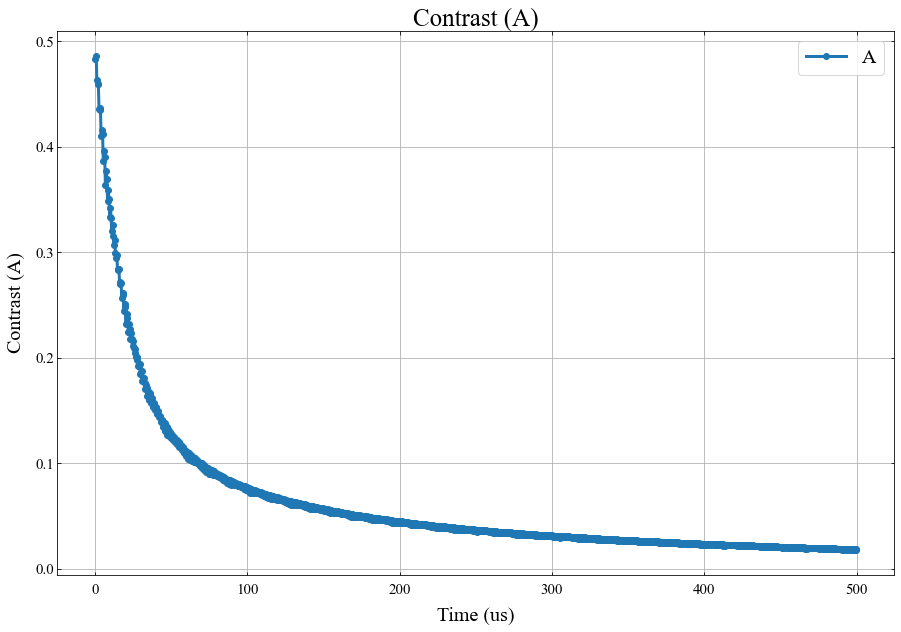

In [520]:
contrast = []
time = []
for i in max[0]:
    contrast.append(final_down[i] - 1/2)
    time.append(t_wait_list[i])

'''plt.plot'''
plt.figure(figsize = (15, 10))
plt.rc('font',family='Times New Roman')
plt.plot(time, contrast, marker = 'o', lw=3)
plt.title('Contrast (A)', fontdict={'family' : 'Times New Roman', 'size':25})
plt.xlabel('Time (us)', fontdict={'family' : 'Times New Roman', 'size':20})
plt.ylabel('Contrast (A)', fontdict={'family' : 'Times New Roman', 'size':20})
plt.yticks(fontproperties='Times New Roman', size=15)
plt.xticks(fontproperties='Times New Roman', size=15)
plt.legend(("A",), fontsize=20)
plt.grid(True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[40.05610457]
[26]


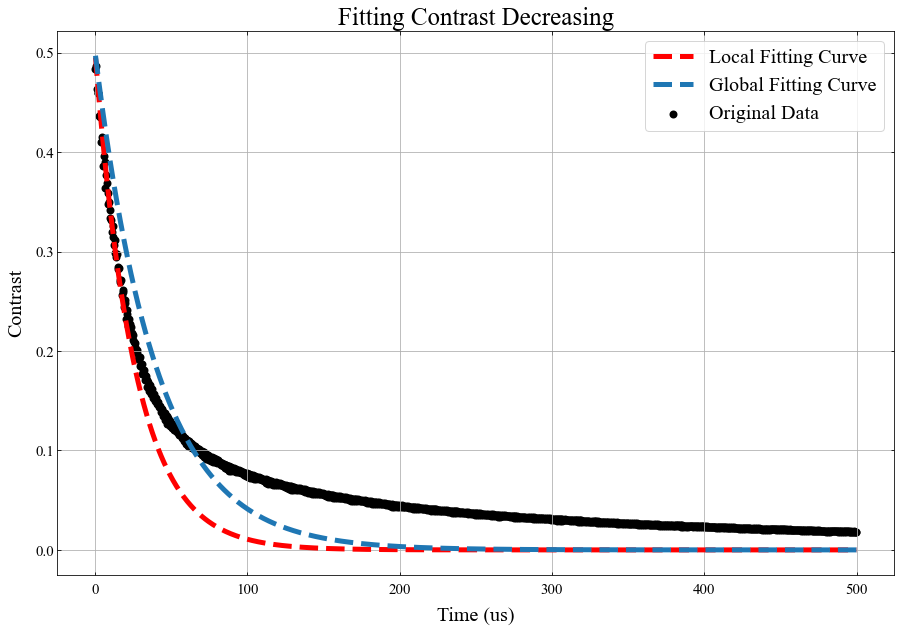

In [521]:
#Fitting Time and Contrast
'''contrast = []'''
'''time = []'''
def decrease(t, d_time):
    return 0.5 * np.exp(-t / d_time)

def decrease_try(t, d_time):
    return 0.5 * np.exp(-t / d_time)

par0 = np.array([26])
par, cov = fitter.curve_fit(decrease, time, contrast, par0)
y = []
for i in range(len(time)):
    y.append(decrease(time[i], *par0))

fit_y = []
for i in range(len(time)):
    fit_y.append(decrease(time[i], *par))

print(par)
print(par0)

'''plt.plot'''
plt.figure(figsize = (15, 10))
plt.rc('font',family='Times New Roman')
plt.plot(time, y, 'r--', lw=5)
plt.plot(time, fit_y, 'C0--', lw=5)
plt.scatter(time, contrast, color='k', marker='.', linewidths = 5)
plt.title('Fitting Contrast Decreasing', fontdict={'family' : 'Times New Roman', 'size':25})
plt.xlabel('Time (us)', fontdict={'family' : 'Times New Roman', 'size':20})
plt.ylabel('Contrast', fontdict={'family' : 'Times New Roman', 'size':20})
plt.yticks(fontproperties='Times New Roman', size=15)
plt.xticks(fontproperties='Times New Roman', size=15)
plt.legend(("Local Fitting Curve", "Global Fitting Curve", "Original Data"), fontsize=20)
plt.grid(True)
plt.show()

[nan, nan, nan, nan, nan, nan, nan, nan, 0.02386084923317571, 0.020680584292035502, 0.02301261609005226, 0.03581176329698653, 0.031488728058832974, 0.034154006545529185, 0.045621942501843996, 0.040099868605974406, 0.043248649892716255, 0.05225185228959078, 0.04775931530595511, 0.05145338095237934, 0.05848182265817324, 0.0549058740194725, 0.05919578436347835, 0.06452081651173532, 0.061750404586942385, 0.06668707669543858, 0.0704408037214927, 0.06841930829799, 0.07405694091583152, 0.07628666247072981, 0.07498871800711443, 0.08138503903772429, 0.08209271719678952, 0.08151393456392851, 0.08873202500692703, 0.08788576320741154, 0.0880355304032964, 0.096142647741143, 0.09367979433822834, 0.09457850581391122, 0.10364735006607483, 0.09949716224953872, 0.10117397610836926, 0.11128341280545875, 0.10534221224132591, 0.10783237036380955, 0.1164669590032401, 0.11122947527962124, 0.11457620685050239, 0.12167646704730439, 0.11716852762517381, 0.1214185902444722, 0.12691015146378234, 0.123157513495501

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-522-483cef811dcc>:7: RuntimeWarning: invalid value encountered in sqrt
  result_temp = np.sqrt((0.00375 * np.cos(phase)**2)/A**2 - 0.005 * np.cos(phase)**4 + (0.00125) * np.sin(phase)**2 / A**2 - 0.00375 * np.sin(2 * phase)**2)


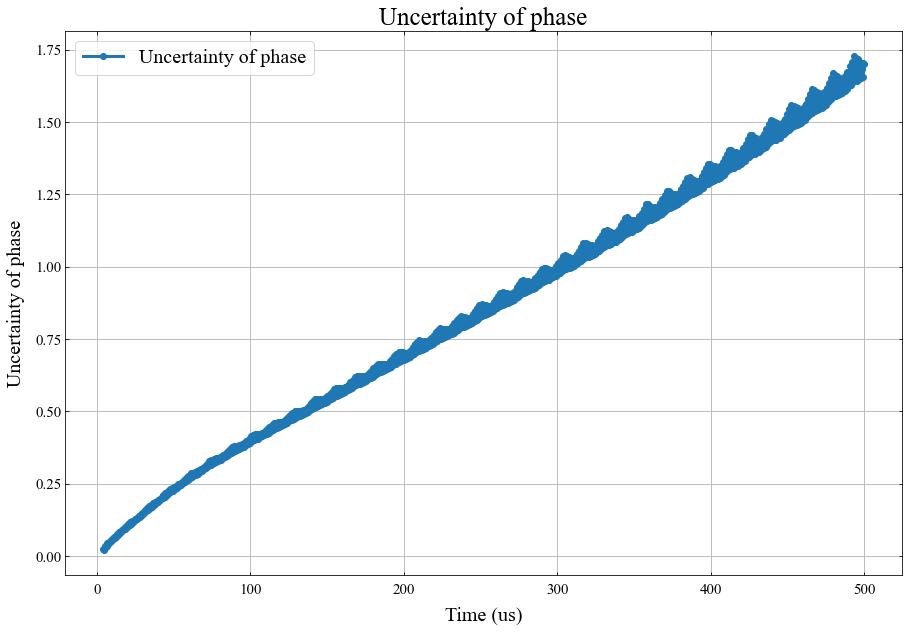

In [522]:

def d_phase_all(A, B, phase):
    coe = 1 / (10 * np.sqrt(2))
    result_temp = np.sqrt((-1/A**2) * (A**2*np.cos(phase)**4) + (B - 1)*B*np.sin(phase)**2 + np.cos(phase)**2*(3*(B-1)*B+4*A*(2*B-1)*np.sin(phase)+3*A**2*np.sin(phase)**2))
    return result_temp * coe

def d_phase(A, phase):
    result_temp = np.sqrt((0.00375 * np.cos(phase)**2)/A**2 - 0.005 * np.cos(phase)**4 + (0.00125) * np.sin(phase)**2 / A**2 - 0.00375 * np.sin(2 * phase)**2)
    return result_temp

d_phase_result = []
for i in max[0]:
    temp = 2 * final_down[i] - 1
    d_phase_result.append(d_phase(temp, 0))
print(d_phase_result)

'''plt.plot'''
plt.figure(figsize = (15, 10))
plt.rc('font',family='Times New Roman')
plt.plot(time, d_phase_result, marker = 'o', lw=3)
plt.title('Uncertainty of phase', fontdict={'family' : 'Times New Roman', 'size':25})
plt.xlabel('Time (us)', fontdict={'family' : 'Times New Roman', 'size':20})
plt.ylabel('Uncertainty of phase', fontdict={'family' : 'Times New Roman', 'size':20})
plt.yticks(fontproperties='Times New Roman', size=15)
plt.xticks(fontproperties='Times New Roman', size=15)
plt.legend(("Uncertainty of phase",), fontsize=20)
plt.grid(True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


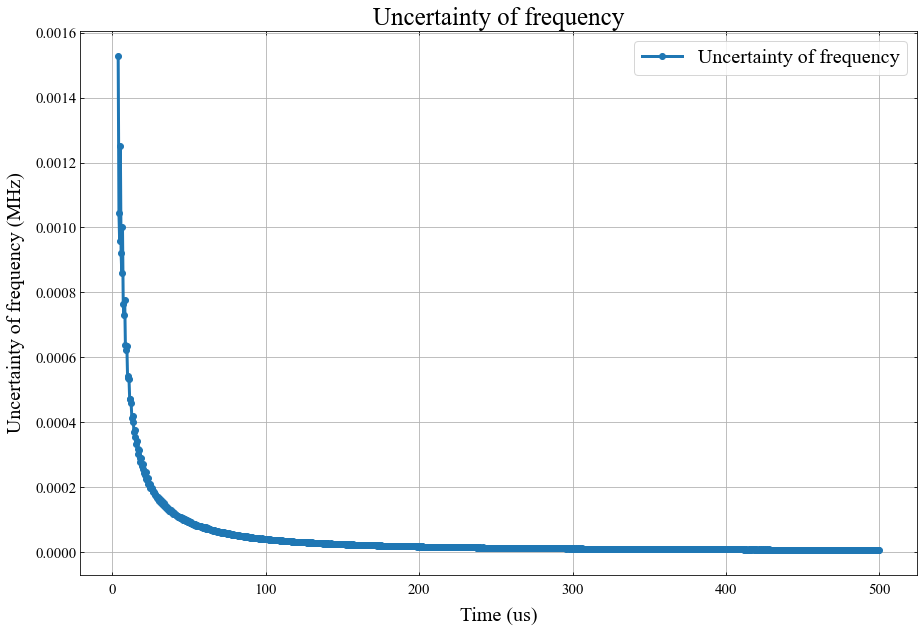

In [523]:
u_phase = []
for i in range(len(d_phase_result)):
    u_phase.append(d_phase_result[i] / time[i] ** 2)

'''plt.plot'''
plt.figure(figsize = (15, 10))
plt.rc('font',family='Times New Roman')
plt.plot(time, u_phase, marker = 'o', lw=3)
plt.title('Uncertainty of frequency', fontdict={'family' : 'Times New Roman', 'size':25})
plt.xlabel('Time (us)', fontdict={'family' : 'Times New Roman', 'size':20})
plt.ylabel('Uncertainty of frequency (MHz)', fontdict={'family' : 'Times New Roman', 'size':20})
plt.yticks(fontproperties='Times New Roman', size=15)
plt.xticks(fontproperties='Times New Roman', size=15)
plt.legend(("Uncertainty of frequency",), fontsize=20)
plt.grid(True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


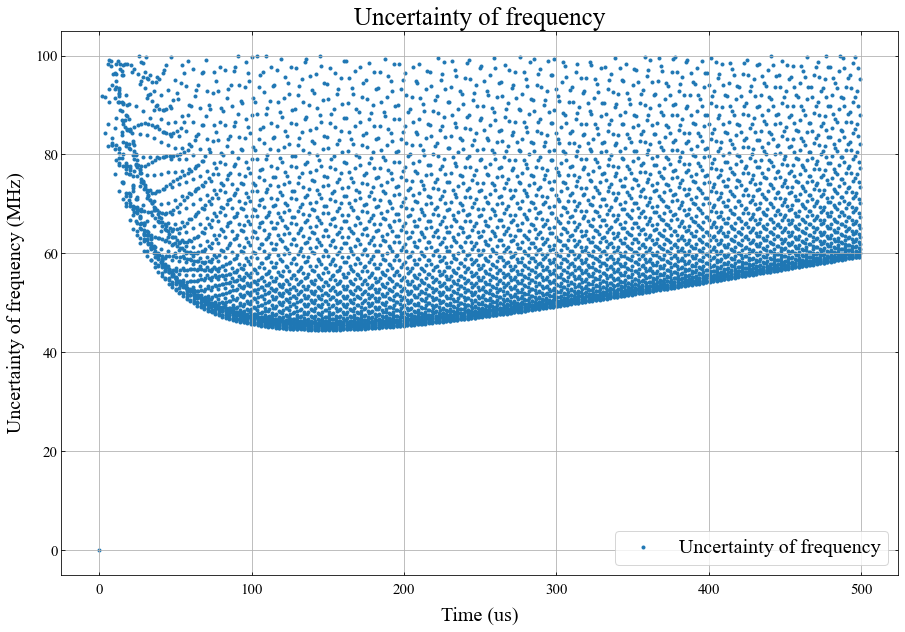

In [524]:
freq0 = 13.44657262
T = 1000
u_phase_base = []

'''
for h = 1, we have [ 0.5001576   0.99968619 13.44657262 10.9956268 ]
for h = 1.01, we have [ 0.50009912  0.99980453 13.58089893  4.71236935]
for h = 0.99, we have [ 0.50025409  0.99949689 13.31170223  4.71238118]
'''

'''
for i in range(len(d_phase_result)):
    P = contrast[i] + 0.5
    temp1 = np.sqrt(P * (1 - P) * (time[i]) / 1 * T)
    temp2 = time[i]
    u_phase_base.append(temp1 / temp2)


u_phase_base = []
for i in range(len(final_down)):
    P = final_down[i]
    temp1 = np.sqrt(P * (1 - P) * (time[i]) / 1 * T)
    # temp2 = time[i] ???
    u_phase_base.append(temp1 / temp2)
'''
t_wait_list = list(t_wait_list)

final_down_99 = np.load('h_bar_more = 0.999.npy')
final_down_00 = np.load('h_bar_more = 1.0.npy')
final_down_01 = np.load('h_bar_more = 1.001.npy')
'''
final_down_99 = np.load('h_bar = 0.99.npy')
final_down_00 = np.load('h_bar = 1.0.npy')
final_down_01 = np.load('h_bar = 1.01.npy')
'''

for i in range(len(final_down)):
    P = final_down[i]
    temp1 = np.sqrt(P * (1 - P) * (t_wait_list[i]) / 1 * T)
    temp2 = abs((final_down_99[i] - final_down_01[i]) / 0.0268786)   #0.269197
    u_phase_base.append(temp1 / temp2)

new_t_wait_list = []
new_u_phase_base = []
for i in range(len(final_down)):
    if (u_phase_base[i] >= 100):
        #del t_wait_list[i]
        #del u_phase_base[i]
        continue
    else:
        new_t_wait_list.append(t_wait_list[i])
        new_u_phase_base.append(u_phase_base[i])

'''plt.plot'''
plt.figure(figsize = (15, 10))
plt.rc('font',family='Times New Roman')
plt.scatter(new_t_wait_list, new_u_phase_base, marker = '.')
plt.title('Uncertainty of frequency', fontdict={'family' : 'Times New Roman', 'size':25})
plt.xlabel('Time (us)', fontdict={'family' : 'Times New Roman', 'size':20})
plt.ylabel('Uncertainty of frequency (MHz)', fontdict={'family' : 'Times New Roman', 'size':20})
plt.yticks(fontproperties='Times New Roman', size=15)
plt.xticks(fontproperties='Times New Roman', size=15)
plt.legend(("Uncertainty of frequency",), fontsize=20)
plt.grid(True)
plt.show()

In [525]:
print(d_phase(0.001, 0))
print(d_phase(0.0001, 0))
print(d_phase(0.00001, 0))

print(d_phase(0.001, np.pi/2))
print(d_phase(0.0001, np.pi/2))
print(d_phase(0.00001, np.pi/2))

print(d_phase(0.001, np.pi/4))
print(d_phase(0.0001, np.pi/4))
print(d_phase(0.00001, np.pi/4))

print(d_phase_all(0.001, 0.5, np.pi/4))
print(d_phase_all(0.0001, 0.5, np.pi/4))
print(d_phase_all(0.00001, 0.5, np.pi/4))

61.2372027447368
612.3724316133116
6123.7243565496965
35.35533905932738
353.5533905932738
3535.5339059327375
49.99994999997501
499.999995
4999.9999995
nan
nan
nan


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-522-483cef811dcc>:3: RuntimeWarning: invalid value encountered in sqrt
  result_temp = np.sqrt((-1/A**2) * (A**2*np.cos(phase)**4) + (B - 1)*B*np.sin(phase)**2 + np.cos(phase)**2*(3*(B-1)*B+4*A*(2*B-1)*np.sin(phase)+3*A**2*np.sin(phase)**2))


In [526]:
np.save('h_bar_more = 1.npy', final_down)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
